# Наискорейший спуск с одномерным поиском методом золотого сечения

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from Functions.functions_under_study import f_well, f_poor, f_rozen, grad_well, grad_poor, grad_rozen
from Functions.optimization import steepest_grad_descent

In [3]:
func_names = [f_well, f_poor, f_rozen]
grad_names = [grad_well, grad_poor, grad_rozen]
func_labels = ['Well-conditioned',
               'Poorly-conditioned',
               'Rosenbrock']

N_FUNC = len(func_names)

In [4]:
N_EPS = 5
EPS_INIT = -1
eps_var = np.logspace(EPS_INIT, EPS_INIT-N_EPS+1, N_EPS)
print(eps_var)

[1.e-01 1.e-02 1.e-03 1.e-04 1.e-05]


In [5]:
x0_optim_arr     = np.empty((N_FUNC,), dtype='object')
x1_optim_arr     = np.empty((N_FUNC,), dtype='object')
iter_counter_arr = np.empty((N_FUNC,), dtype='object')
func_counter_arr = np.empty((N_FUNC,), dtype='object')
grad_counter_arr = np.empty((N_FUNC,), dtype='object')

# Начальное приближение.
x_init = np.array([-2.2, -2.2])

for ndx, func, grad in zip(range(N_FUNC), func_names, grad_names):
    
        x0_optim_list     = []
        x1_optim_list     = []
        iter_counter_list = []
        func_counter_list = []
        grad_counter_list = []
    
        for eps in eps_var:
            x_optim, _, iter_final, func_counter, grad_counter = steepest_grad_descent(
                loss_func=func,
                grad_func=grad,
                x_init=x_init, 
                tolerance=eps,
                printoutput=False
                )
            x0_optim_list.append(x_optim[0])
            x1_optim_list.append(x_optim[1])
            iter_counter_list.append(iter_final)
            func_counter_list.append(func_counter)
            grad_counter_list.append(grad_counter)
                       
        x0_optim_arr[ndx] = x0_optim_list
        x1_optim_arr[ndx] = x1_optim_list
        iter_counter_arr[ndx] = iter_counter_list
        func_counter_arr[ndx] = func_counter_list
        grad_counter_arr[ndx] = grad_counter_list

Преобразуем в таблицы.

In [6]:
col_name_x_optim = []
for var_name in func_labels:
    col_name_x_optim.append(var_name + ' (x1)')
    col_name_x_optim.append(var_name + ' (x2)')

x_optim_tbl      = eps_var.copy()
iter_counter_tbl = eps_var.copy()
func_counter_tbl = eps_var.copy()
grad_counter_tbl = eps_var.copy()

for colx1, colx2, col_iter, col_func, col_grad in zip(
    x0_optim_arr,
    x1_optim_arr,
    iter_counter_arr,
    func_counter_arr,
    grad_counter_arr
    ):
    x_optim_tbl      = np.vstack((x_optim_tbl, colx1, colx2))
    iter_counter_tbl = np.vstack((iter_counter_tbl, col_iter))
    func_counter_tbl = np.vstack((func_counter_tbl, col_func))
    grad_counter_tbl = np.vstack((grad_counter_tbl, col_grad))

x_optim_tbl_set = pd.DataFrame(x_optim_tbl.T, columns=['eps'] + col_name_x_optim)

iter_counter_tbl_set = pd.DataFrame(iter_counter_tbl.T, columns=['eps'] + func_labels)
iter_counter_tbl_set[func_labels] = iter_counter_tbl_set[func_labels].astype(int)

func_counter_tbl_set = pd.DataFrame(func_counter_tbl.T, columns=['eps'] + func_labels)
func_counter_tbl_set[func_labels] = func_counter_tbl_set[func_labels].astype(int)

grad_counter_tbl_set = pd.DataFrame(grad_counter_tbl.T, columns=['eps'] + func_labels)
grad_counter_tbl_set[func_labels] = grad_counter_tbl_set[func_labels].astype(int)

In [7]:
tables_all = [x_optim_tbl_set, iter_counter_tbl_set, func_counter_tbl_set, grad_counter_tbl_set]
titles_all = [
    'Координаты минимума функции',
    'Количество итераций',
    'Количество вычислений функции',
    'Количество вычислений градиента']

In [8]:
for ttl, tbl in zip(titles_all, tables_all):
    print(ttl)
    display(tbl)

Координаты минимума функции


,eps,Well-conditioned (x1),Well-conditioned (x2),Poorly-conditioned (x1),Poorly-conditioned (x2),Rosenbrock (x1),Rosenbrock (x2)
0,0.10000,-0.007502,0.004304,-5.498643,-0.207143,0.917361,0.841071
1,0.01000,-0.000609,-0.000609,-5.517315,-0.207726,0.991507,0.983039
2,0.00100,-0.000123,0.000071,-5.519263,-0.207785,0.999010,0.998015
3,0.00010,-0.000010,-0.000010,-5.519459,-0.207792,0.999901,0.999802
4,0.00001,-0.000002,0.000001,-5.519480,-0.207792,0.999990,0.999980


Количество итераций


,eps,Well-conditioned,Poorly-conditioned,Rosenbrock
0,0.10000,3,245,1028
1,0.01000,4,355,3548
2,0.00100,5,465,6128
3,0.00010,6,577,8775
4,0.00001,7,659,11290


Количество вычислений функции


,eps,Well-conditioned,Poorly-conditioned,Rosenbrock
0,0.10000,51,4165,17476
1,0.01000,68,6035,60316
2,0.00100,85,7905,104176
3,0.00010,102,9809,149175
4,0.00001,119,11203,191930


Количество вычислений градиента


,eps,Well-conditioned,Poorly-conditioned,Rosenbrock
0,0.10000,4,246,1029
1,0.01000,5,356,3549
2,0.00100,6,466,6129
3,0.00010,7,578,8776
4,0.00001,8,660,11291


# Графики

In [9]:
user_figsize = (12, 6)
user_fontsize = 16
user_markersize = 12

## Координаты минимума функции

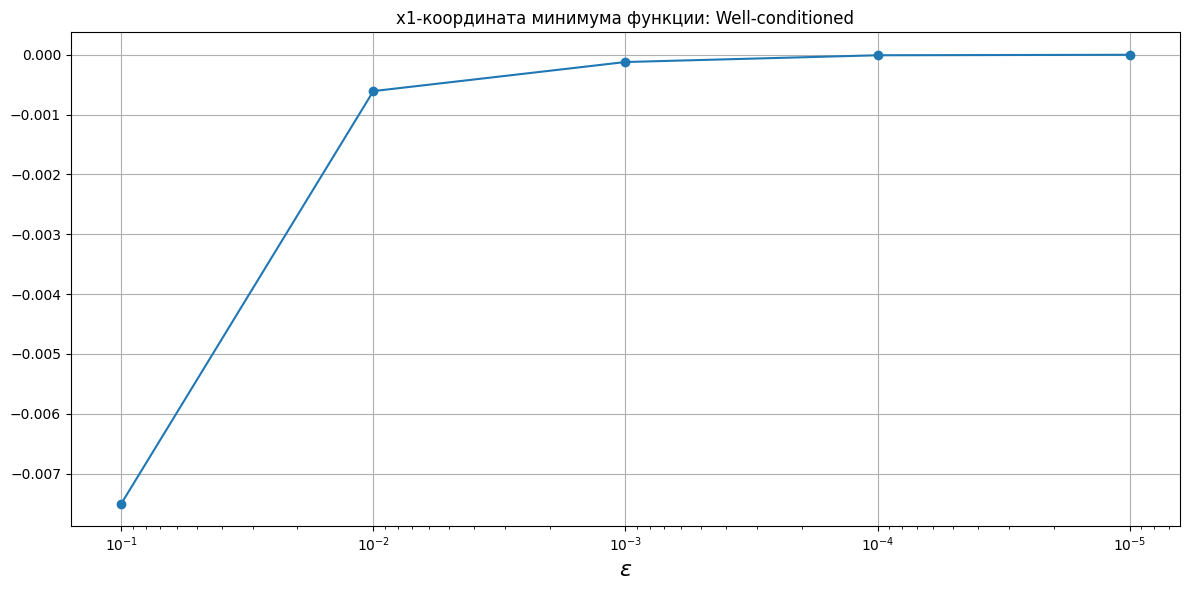

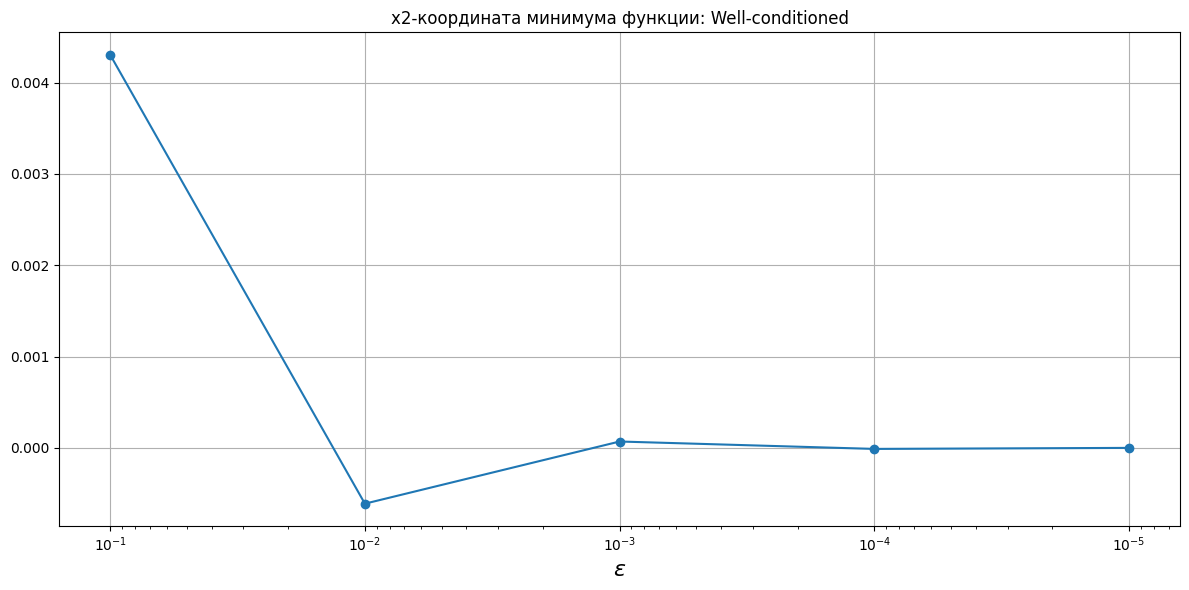

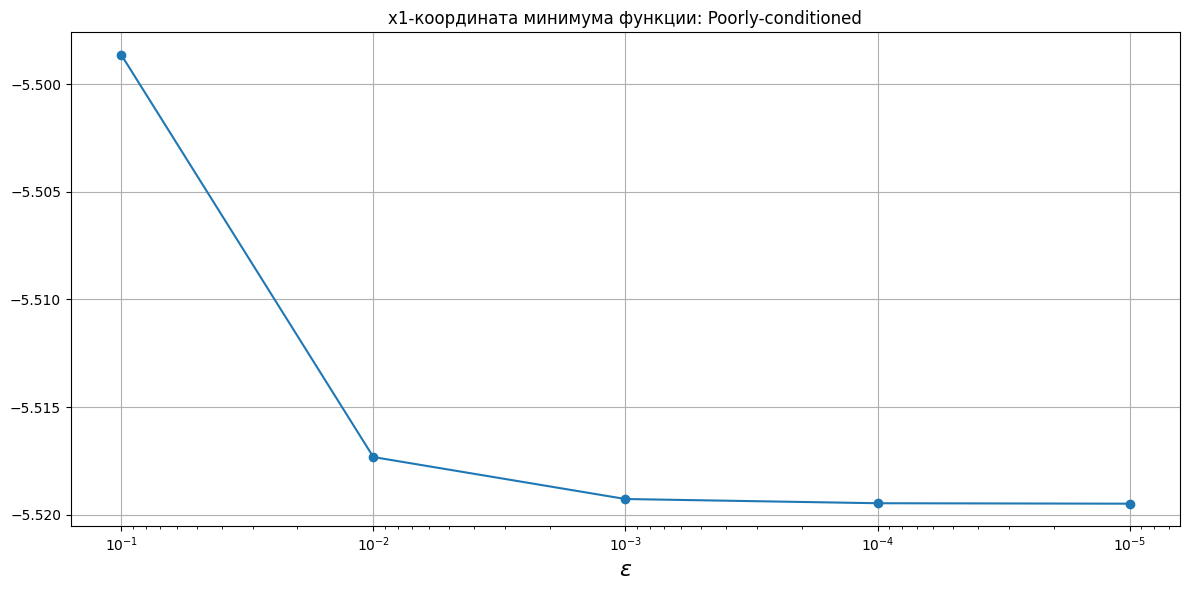

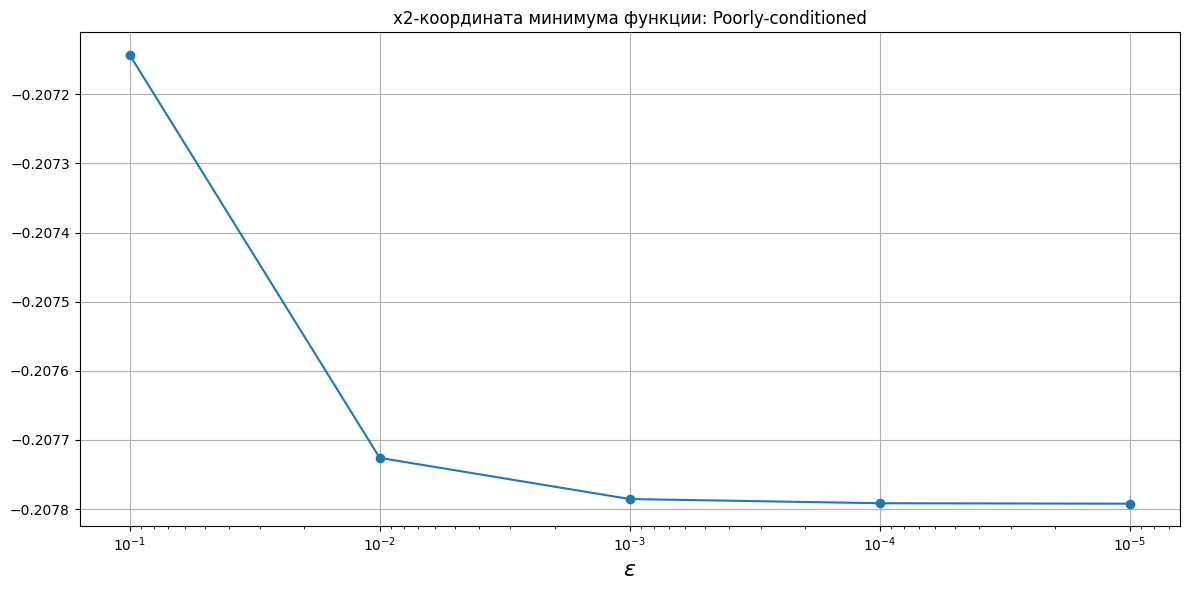

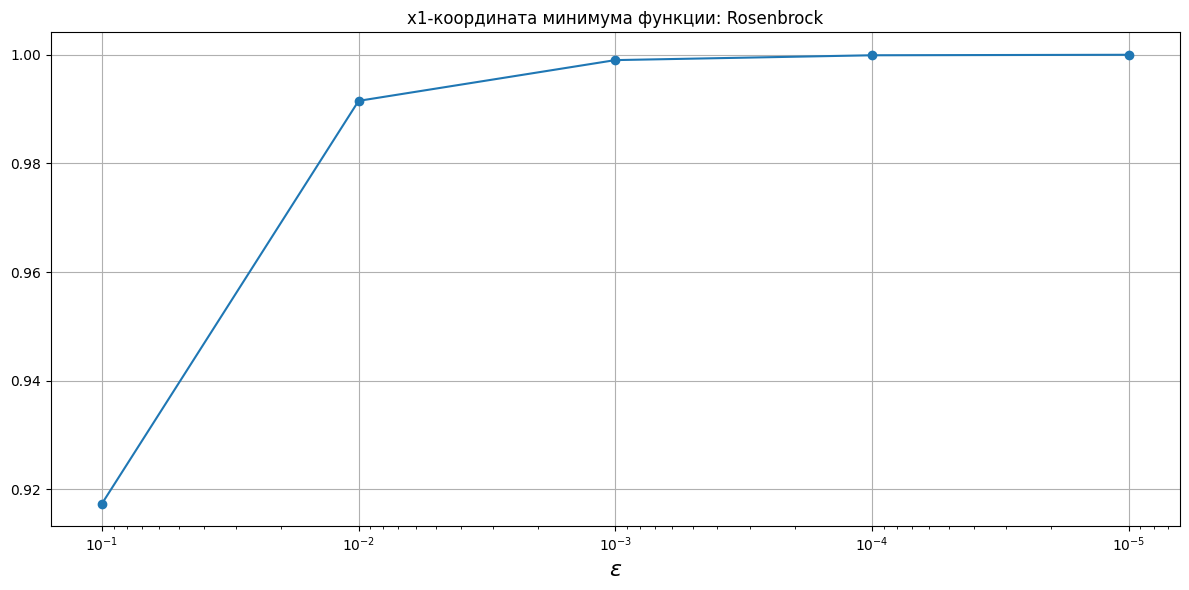

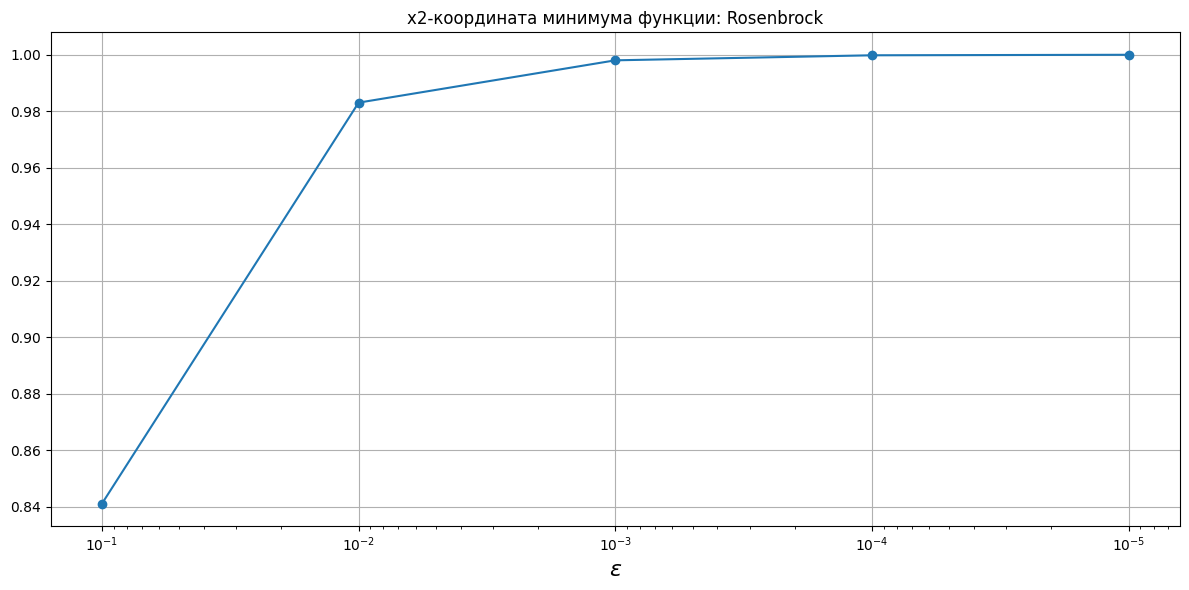

In [10]:
for ndx, lbl in enumerate(func_labels):
    for idx in range(2):
        plt.figure(figsize=user_figsize)
        plt.plot(
            x_optim_tbl_set['eps'],
            x_optim_tbl_set.iloc[:,(1+idx)+2*ndx],
            marker='.', markersize=user_markersize)
        plt.gca().invert_xaxis()
        plt.title('x' + str(idx+1) + '-координата минимума функции: ' + lbl)
        plt.grid()
        plt.xscale('log')
        plt.xlabel('$\epsilon$', fontsize=user_fontsize)
        plt.tight_layout()
        plt.savefig('readme_img/steepest_descent_img/' + 'x' + str(idx+1) + '_optim_' + lbl + '.png', bbox_inches='tight')
        plt.show()

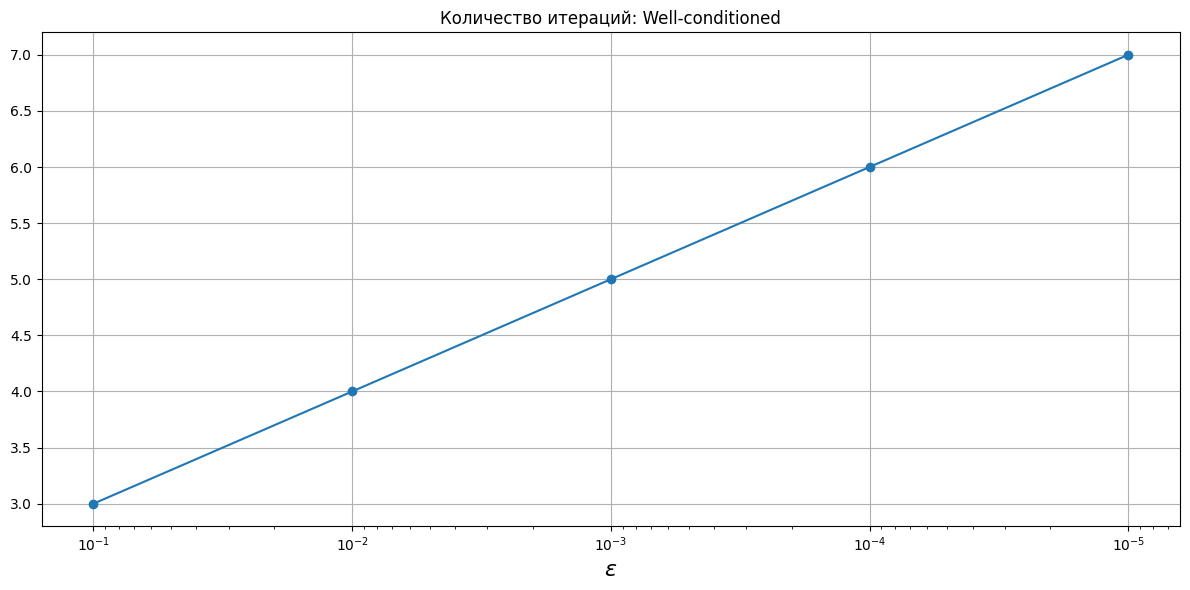

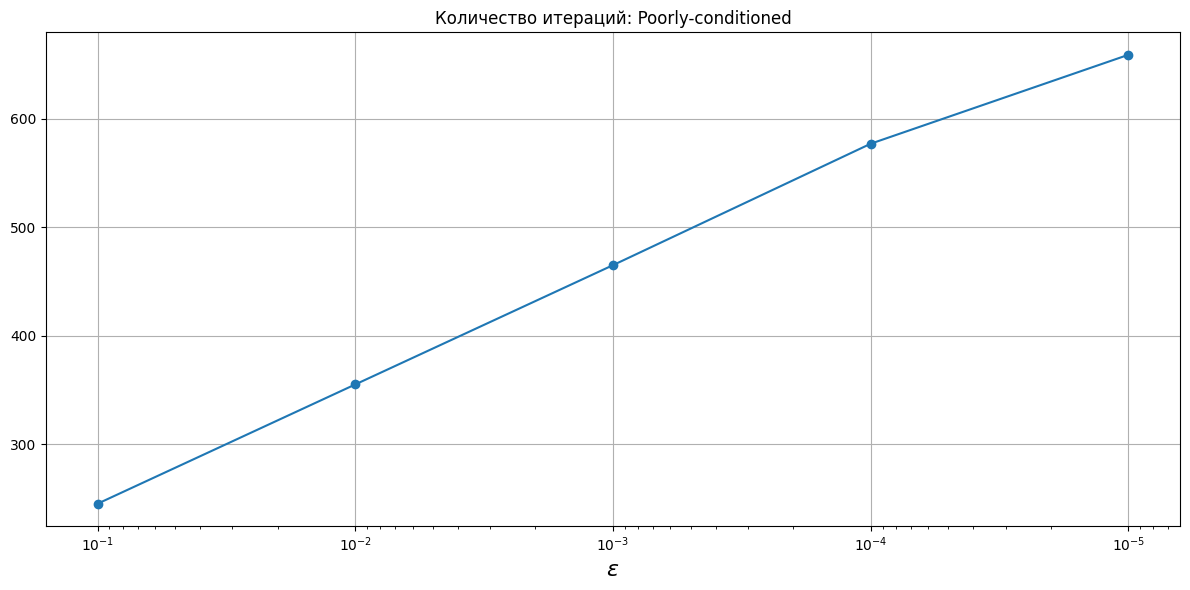

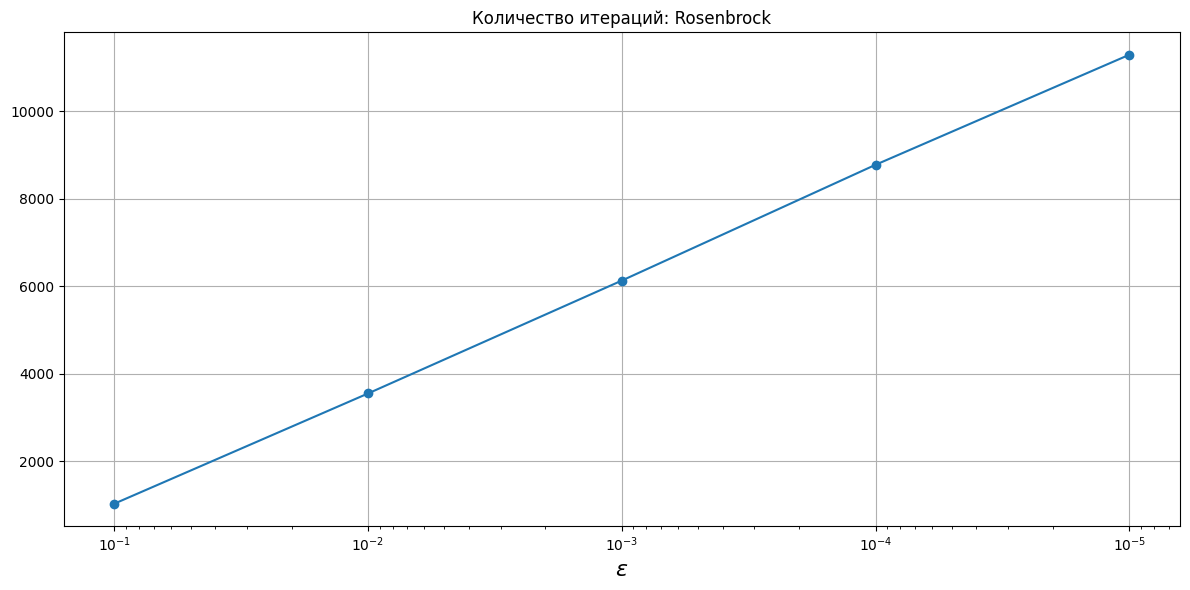

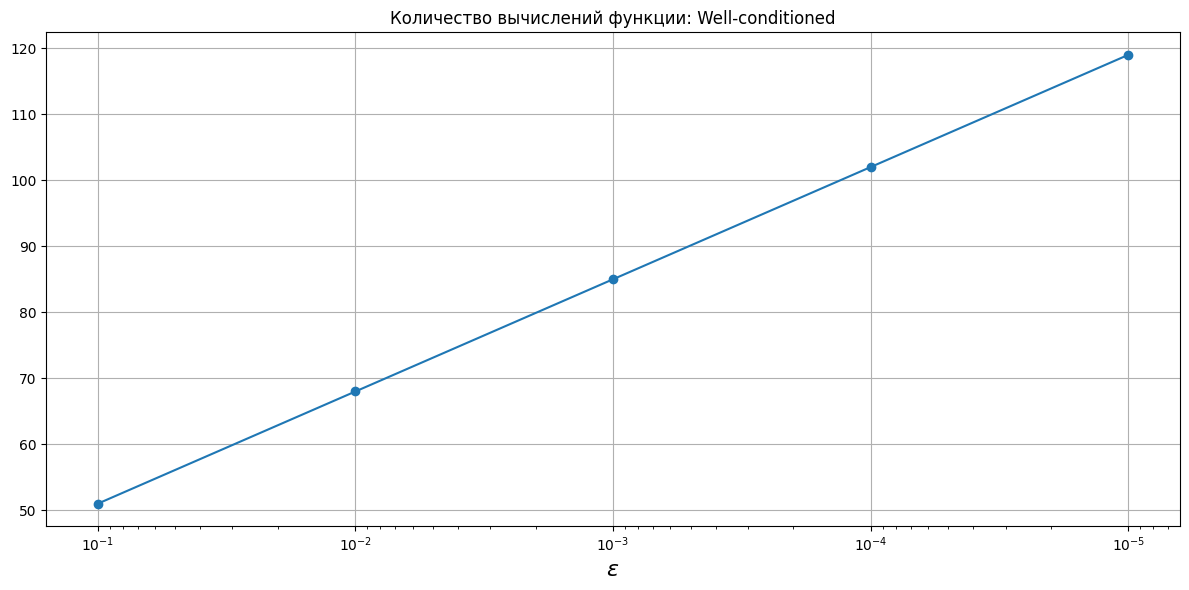

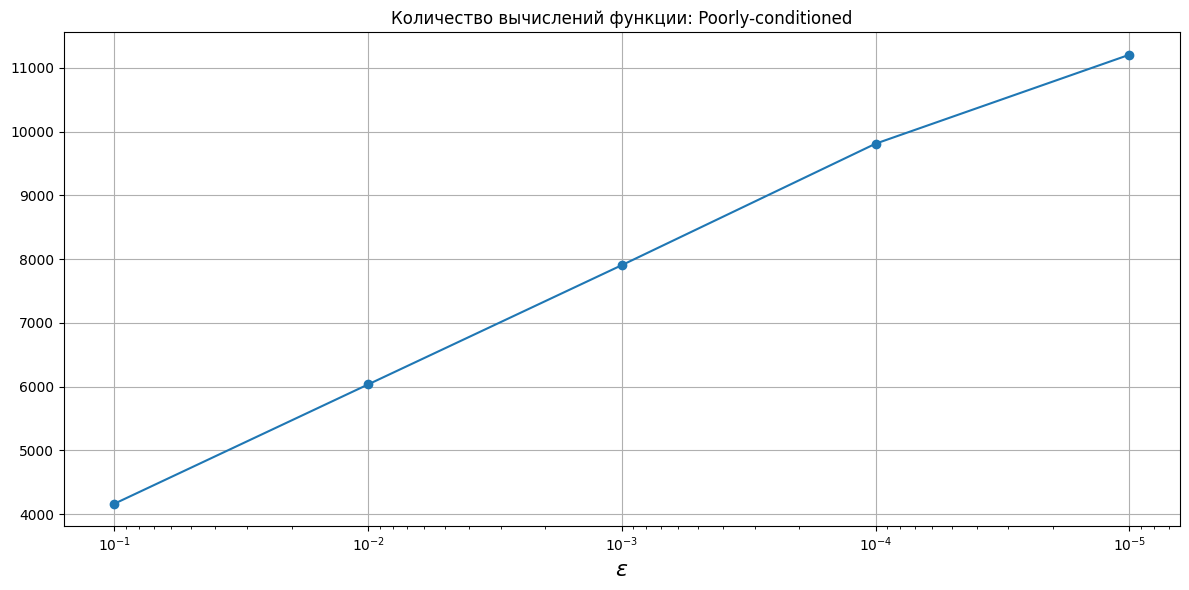

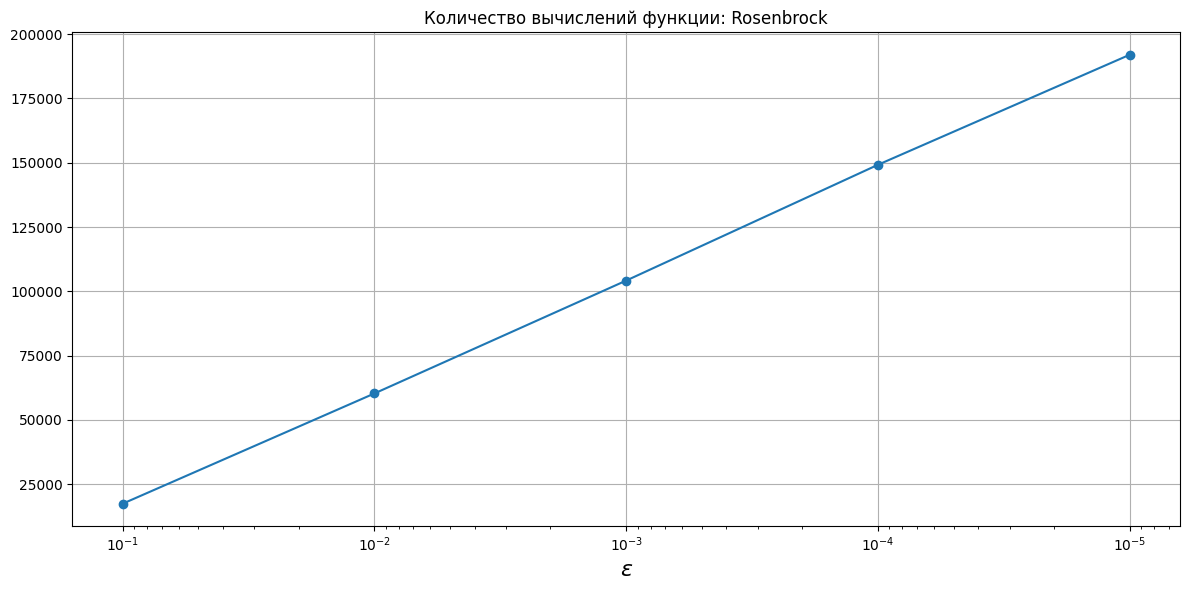

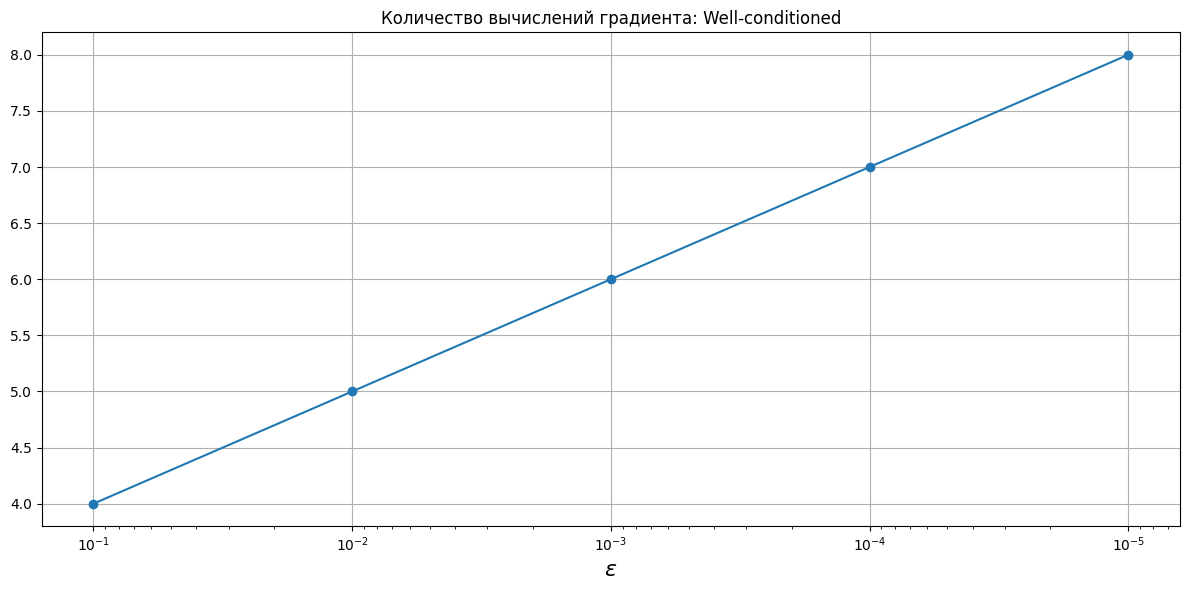

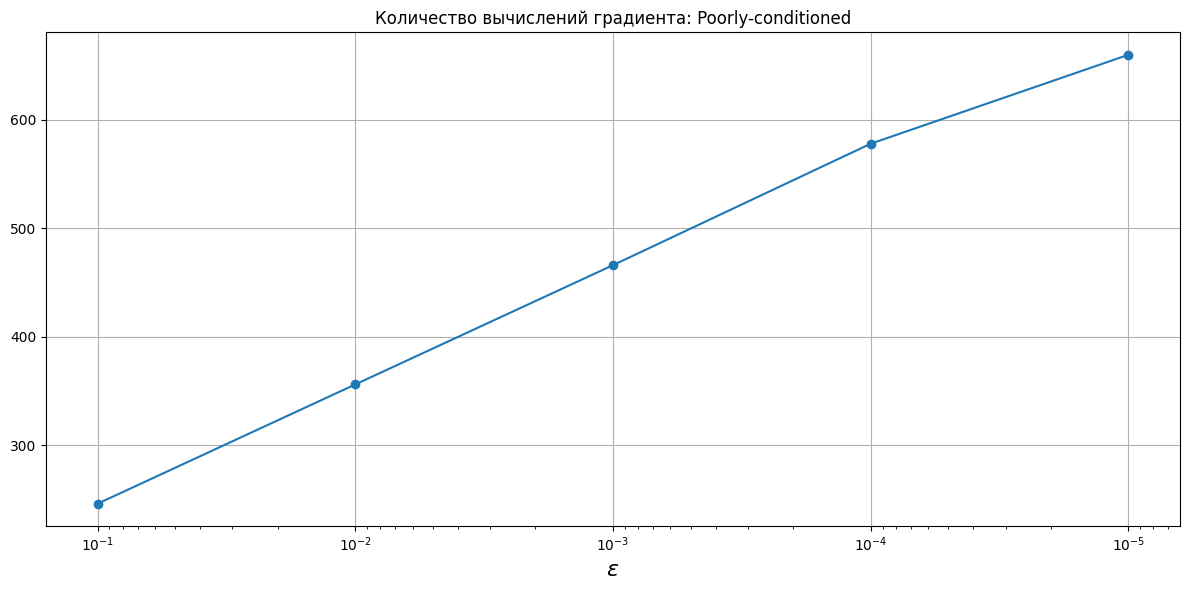

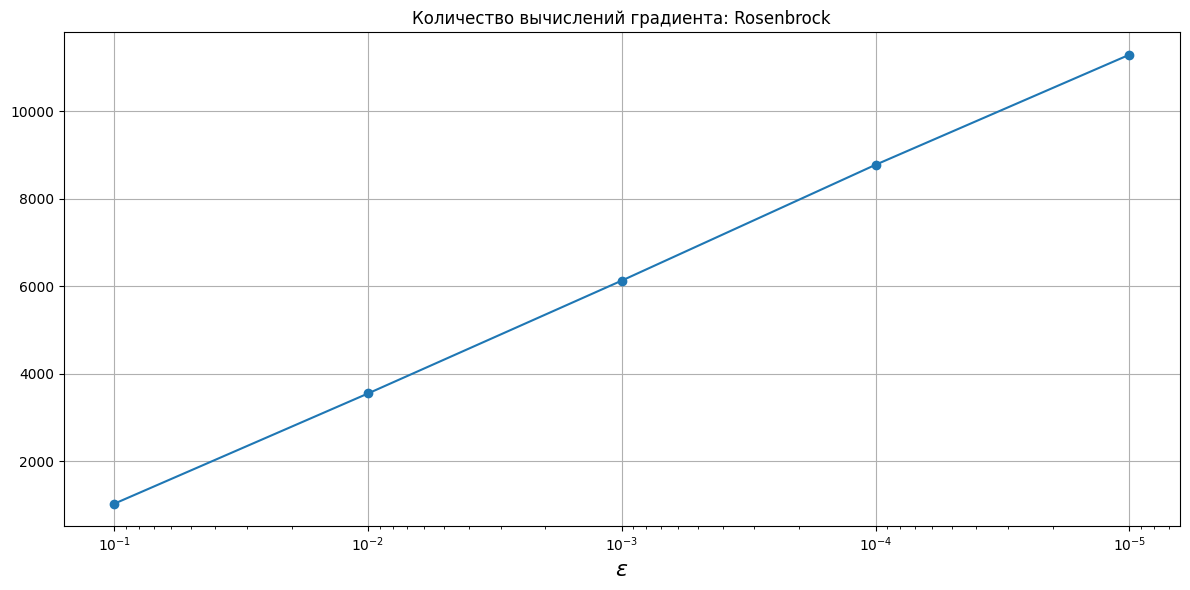

In [11]:
section_names = ['x_optim', 'iter_count', 'func_count', 'grad_count']

for ttl, tbl, file_name in zip(titles_all[1:], tables_all[1:], section_names[1:]):
        for ndx, lbl in enumerate(func_labels):
                plt.figure(figsize=user_figsize)
                plt.plot(
                        tbl['eps'],
                        tbl.iloc[:,1+ndx],
                        marker='.', markersize=user_markersize)
                plt.gca().invert_xaxis()
                plt.title(ttl + ': ' + lbl)
                plt.grid()
                plt.xscale('log')
                plt.xlabel('$\epsilon$', fontsize=user_fontsize)
                plt.tight_layout()
                plt.savefig('readme_img/steepest_descent_img/' + file_name + '_' + lbl + '.png', bbox_inches='tight')
                plt.show()

# Генератор таблиц в приложения

In [12]:
from Functions.user_functions import update_readme_section

In [13]:
for tbl, ttl, section in zip(tables_all, titles_all, section_names):
    update_readme_section(tbl, readme_path='steepest_descent.md', tbl_name=ttl, section=section)